In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import random
%matplotlib inline

In [3]:
from rbfxor.modeling import BaseMLP
from rbfxor.functional import PiecewiseRBF
from rbfxor.dataset import XORDataset, true_xor

## Setting up pytorch-lightning

INFO:root:       Name          Type Params
0    layers    Sequential    9  
1  layers.0        Linear    6  
2  layers.1  PiecewiseRBF    0  
3  layers.2        Linear    3  
4  layers.3       Sigmoid    0  
5      loss       MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 257.04batch/s, batch_nb=15, loss=0.212, v_nb=366]
INFO:root:       Name          Type Params
0    layers    Sequential    9  
1  layers.0        Linear    6  
2  layers.1  PiecewiseRBF    0  
3  layers.2        Linear    3  
4  layers.3       Sigmoid    0  
5      loss       MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 219.23batch/s, batch_nb=15, loss=0.229, v_nb=367]
INFO:root:       Name          Type Params
0    layers    Sequential    9  
1  layers.0        Linear    6  
2  layers.1  PiecewiseRBF    0  
3  layers.2        Linear    3  
4  layers.3       Sigmoid    0  
5      loss       MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 214.05batch/s, batch_nb=15, loss=0.240,

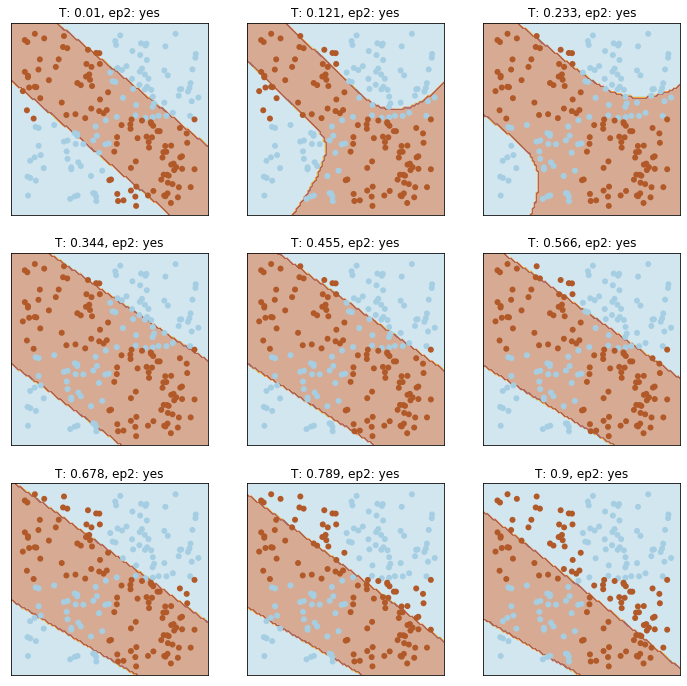

In [35]:
from pytorch_lightning import Trainer

ds_train = XORDataset(10)
ds_test = XORDataset(100)

Ts = torch.linspace(0.01, 0.9, 9)

def train_and_plot(T, ax):
    # model = BaseMLP([8], nn.ReLU(), nn.Sigmoid())
    model = BaseMLP([2], PiecewiseRBF(T=T, rbf_at_0=0.5, ep2=0.6), nn.Sigmoid())
    trainer = Trainer()
    trainer.fit(model)
    model.plot('test', ax)

fig, axes = plt.subplots(3,3, figsize=(12, 12))

title = "T: {:0.3}, ep2: {}"

for ax, T in zip(axes.flatten(), Ts):
    train_and_plot(T, ax)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_title(title.format(T, "yes"))
#     plt.title(title.format(T, "yes"))
    
plt.show()

## Experiment 1

- At this point I need to make the `T` and the `ep2` learnable. In doing this, I might make `ep1` a learnable parameter rather than calculated from `rbf_at_0`
- Create hyperparameters passing in to the main train.py function. 
- Save figures

INFO:root:       Name        Type Params
0    layers  Sequential   49  
1  layers.0      Linear   36  
2  layers.1     Sigmoid    0  
3  layers.2      Linear   13  
4      loss     MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 273.41batch/s, batch_nb=15, loss=0.266, v_nb=382]
INFO:root:       Name        Type Params
0    layers  Sequential   49  
1  layers.0      Linear   36  
2  layers.1     Sigmoid    0  
3  layers.2      Linear   13  
4      loss     MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 271.61batch/s, batch_nb=15, loss=0.273, v_nb=382]
INFO:root:       Name        Type Params
0    layers  Sequential   49  
1  layers.0      Linear   36  
2  layers.1     Sigmoid    0  
3  layers.2      Linear   13  
4      loss     MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 280.28batch/s, batch_nb=15, loss=0.275, v_nb=382]
INFO:root:       Name        Type Params
0    layers  Sequential   49  
1  layers.0      Linear   36  
2  layers.1     Sigmo

Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 272.34batch/s, batch_nb=15, loss=0.281, v_nb=382]
INFO:root:       Name        Type Params
0    layers  Sequential   49  
1  layers.0      Linear   36  
2  layers.1     Sigmoid    0  
3  layers.2      Linear   13  
4      loss     MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 281.40batch/s, batch_nb=15, loss=0.281, v_nb=382]
INFO:root:       Name        Type Params
0    layers  Sequential   49  
1  layers.0      Linear   36  
2  layers.1     Sigmoid    0  
3  layers.2      Linear   13  
4      loss     MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 288.95batch/s, batch_nb=15, loss=0.281, v_nb=382]
INFO:root:       Name        Type Params
0    layers  Sequential   49  
1  layers.0      Linear   36  
2  layers.1     Sigmoid    0  
3  layers.2      Linear   13  
4      loss     MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 305.97batch/s, batch_nb=15, loss=0.281, v_nb=382]
INFO:root:       Name       

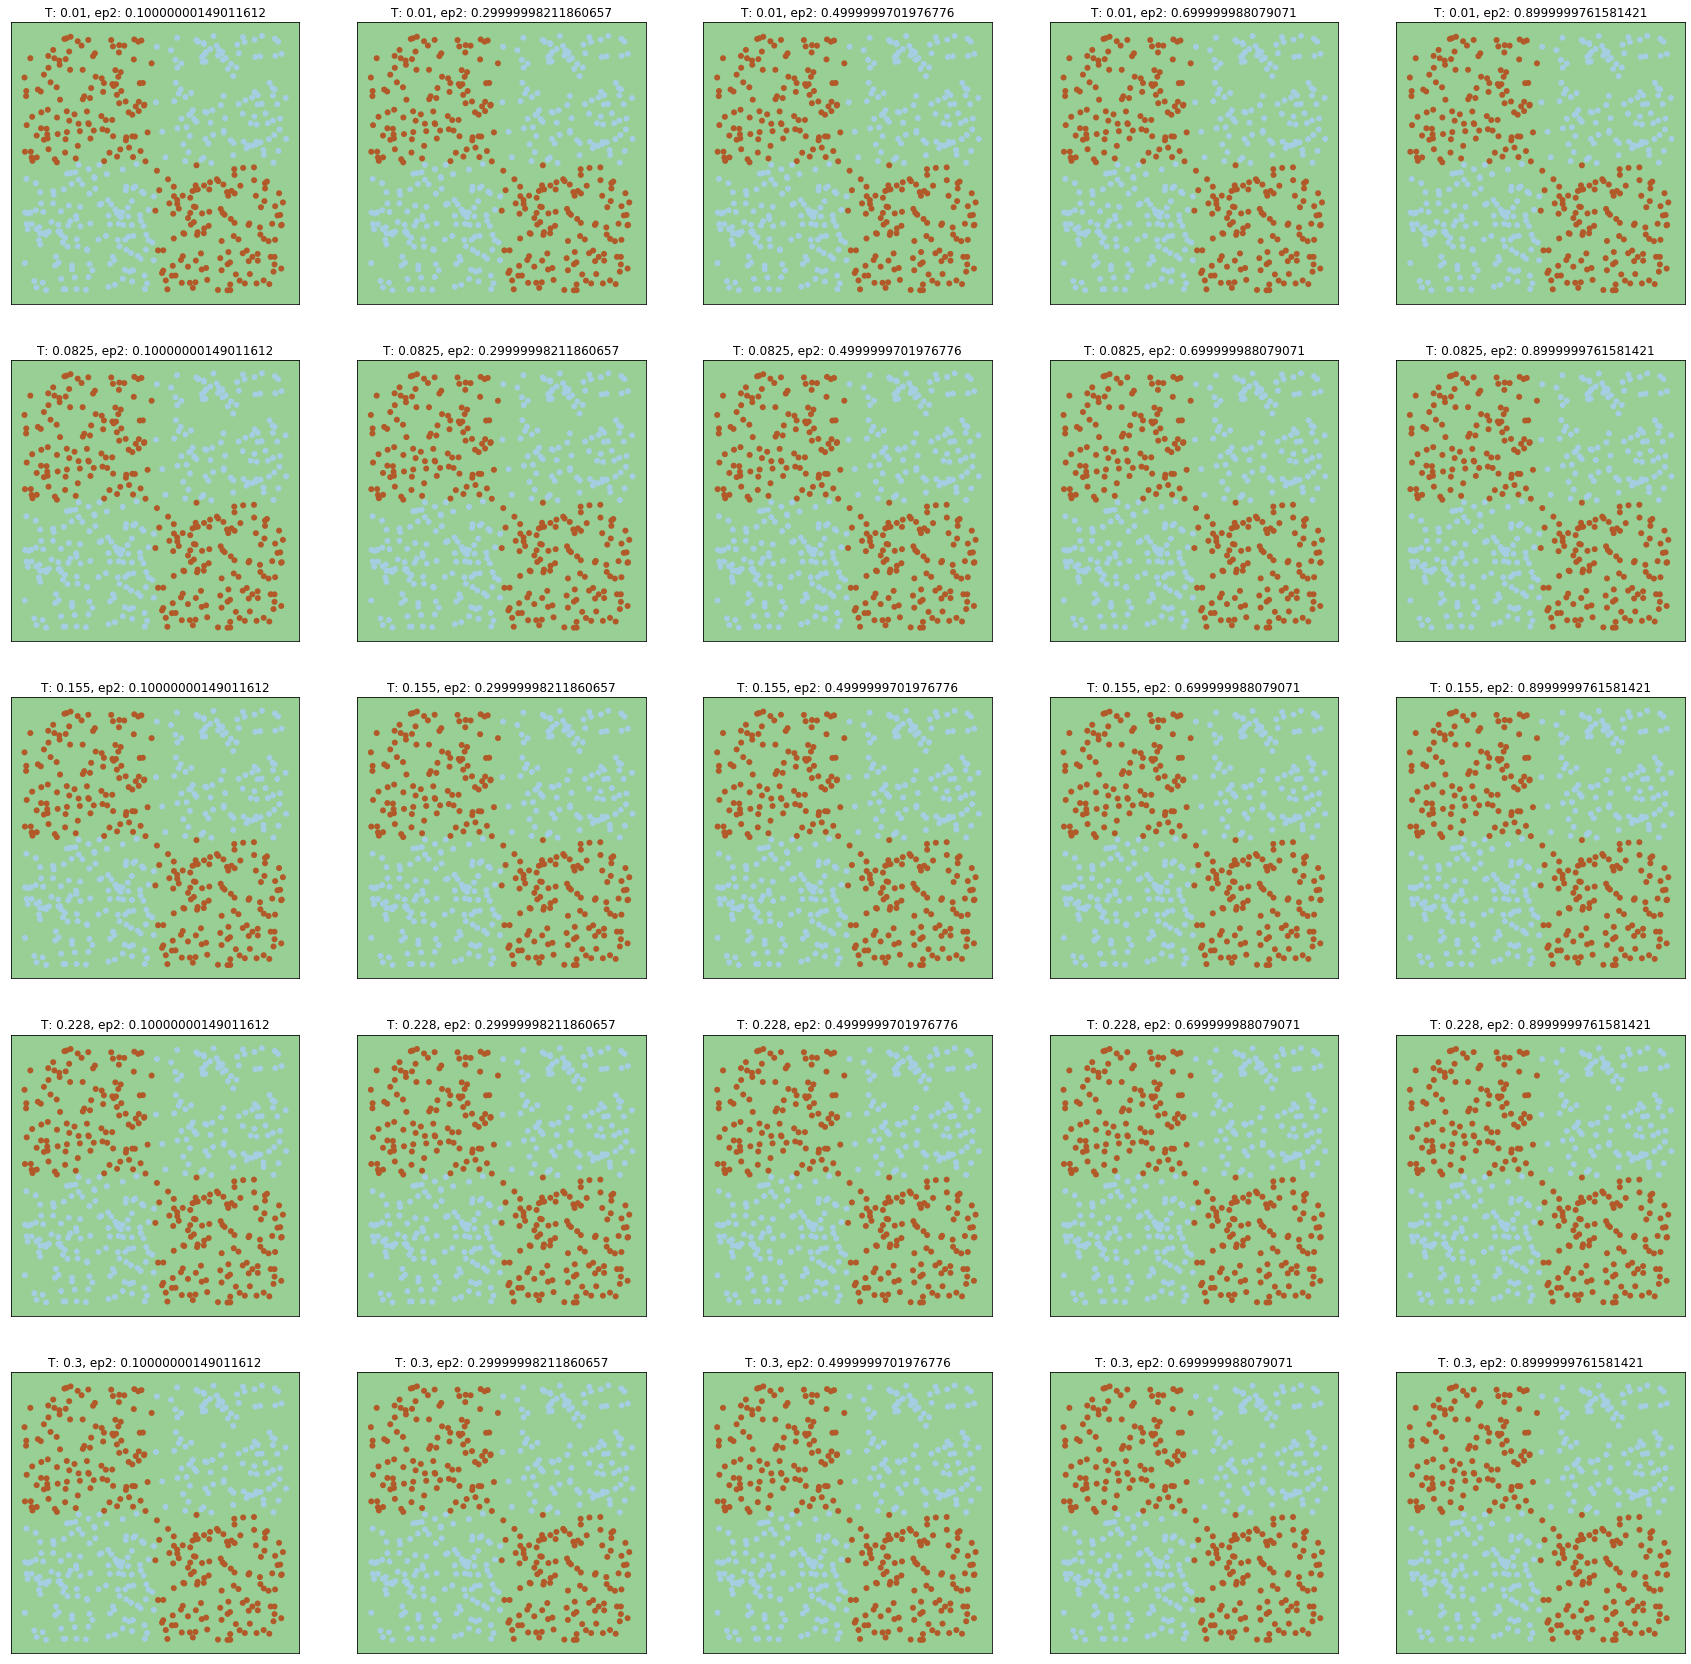

In [20]:
import torch
from pytorch_lightning import Trainer
from rbfxor.modeling import BaseMLP
from rbfxor.functional import PiecewiseRBF

Ts = torch.linspace(0.01, 0.3, 5)
ep2s = torch.linspace(0.1, 0.9, 5)
hdims = [12]
rbf_at_0 = 0.01
trainer = Trainer()

def run_exp(trainer, Ts, ep2s, hdims, rbf_at_0):
    x, y = len(Ts), len(ep2s)
    figscale = 6
    fig, axes = plt.subplots(x, y, figsize=(figscale*y, figscale*x))
    
    title = "T: {:0.3}, ep2: {}"
    
    for i, T in enumerate(Ts):
        for j, ep2 in enumerate(ep2s):
            act_func = PiecewiseRBF(T, rbf_at_0, ep2)
#             act_func = nn.Sigmoid()
            
            model = BaseMLP(hdims, act_func, final_act=None)
            trainer.fit(model)
            ax = axes[i, j]
            model.plot('train', ax)
            ax.get_yaxis().set_visible(False)
            ax.get_xaxis().set_visible(False)
            ax.set_title(title.format(T, ep2))

run_exp(trainer, Ts, ep2s, hdims, rbf_at_0)

## Experimental Plan

### Fixed RBF, hdim. How does the Threshold and ep2 affect the threshold boundaries?

Inputs:
- rbf@0
- hdim
- Ts
- ep2s